# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
import os 
os.getcwd()
os.chdir('D:\TrafficSignDetectionSystem\Train')
os.getcwd()

'D:\\TrafficSignDetectionSystem\\Train'

# Split Folders into train, val , test

In [4]:
import splitfolders
path = os.getcwd()
path
input_folder = os.path.join(path,'DatabaseModified')
splitfolders.ratio(input_folder, output = "DatabaseSplited",
         seed = 42,ratio = (.7,.1,.2),
         group_prefix = None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  6.55 files/s]
Copying files: 6 files [00:00, 27.21 files/s]
Copying files: 12 files [00:00, 38.39 files/s]
Copying files: 19 files [00:00, 48.95 files/s]
Copying files: 25 files [00:00, 52.62 files/s]
Copying files: 33 files [00:00, 58.95 files/s]
Copying files: 40 files [00:00, 60.27 files/s]
Copying files: 49 files [00:00, 67.15 files/s]
Copying files: 56 files [00:01, 60.62 files/s]
Copying files: 65 files [00:01, 68.25 files/s]
Copying files: 73 files [00:01, 66.00 files/s]
Copying files: 83 files [00:01, 72.65 files/s]
Copying files: 91 files [00:01, 73.37 files/s]
Copying files: 99 files [00:01, 68.09 files/s]
Copying files: 108 files [00:01, 73.78 files/s]
Copying files: 117 files [00:01, 77.45 files/s]
Copying files: 125 files [00:01, 71.23 files/s]
Copying files: 134 files [00:02, 74.49 files/s]
Copying files: 142 files [00:02, 73.65 files/s]
Copying files: 150 files [00:02, 73.11 files/s]
Copying files

Copying files: 2513 files [00:37, 47.48 files/s]
Copying files: 2520 files [00:38, 50.84 files/s]
Copying files: 2528 files [00:38, 56.18 files/s]
Copying files: 2538 files [00:38, 64.92 files/s]
Copying files: 2547 files [00:38, 70.98 files/s]
Copying files: 2555 files [00:38, 71.87 files/s]
Copying files: 2563 files [00:38, 72.36 files/s]
Copying files: 2571 files [00:38, 72.78 files/s]
Copying files: 2579 files [00:38, 72.69 files/s]
Copying files: 2587 files [00:38, 70.31 files/s]
Copying files: 2595 files [00:39, 68.47 files/s]
Copying files: 2605 files [00:39, 74.50 files/s]
Copying files: 2613 files [00:39, 75.06 files/s]
Copying files: 2622 files [00:39, 77.04 files/s]
Copying files: 2630 files [00:39, 72.72 files/s]
Copying files: 2639 files [00:39, 73.98 files/s]
Copying files: 2649 files [00:39, 78.86 files/s]
Copying files: 2658 files [00:39, 80.74 files/s]
Copying files: 2667 files [00:39, 76.22 files/s]
Copying files: 2679 files [00:40, 85.33 files/s]
Copying files: 2688 

Copying files: 6355 files [01:15, 111.86 files/s]
Copying files: 6370 files [01:15, 121.53 files/s]
Copying files: 6388 files [01:15, 134.89 files/s]
Copying files: 6406 files [01:15, 143.99 files/s]
Copying files: 6421 files [01:16, 122.74 files/s]
Copying files: 6434 files [01:16, 121.70 files/s]
Copying files: 6447 files [01:16, 114.66 files/s]
Copying files: 6459 files [01:16, 112.96 files/s]
Copying files: 6475 files [01:16, 124.55 files/s]
Copying files: 6488 files [01:16, 95.97 files/s] 
Copying files: 6502 files [01:16, 105.46 files/s]
Copying files: 6514 files [01:16, 99.07 files/s] 
Copying files: 6525 files [01:17, 94.95 files/s]
Copying files: 6537 files [01:17, 100.42 files/s]
Copying files: 6554 files [01:17, 117.82 files/s]
Copying files: 6567 files [01:17, 113.80 files/s]
Copying files: 6581 files [01:17, 120.72 files/s]
Copying files: 6598 files [01:17, 130.61 files/s]
Copying files: 6614 files [01:17, 137.28 files/s]
Copying files: 6628 files [01:17, 134.20 files/s]
C

Copying files: 9891 files [01:52, 65.16 files/s]
Copying files: 9900 files [01:52, 68.68 files/s]
Copying files: 9907 files [01:53, 66.25 files/s]
Copying files: 9914 files [01:53, 67.10 files/s]
Copying files: 9921 files [01:53, 66.57 files/s]
Copying files: 9930 files [01:53, 70.56 files/s]
Copying files: 9938 files [01:53, 72.62 files/s]
Copying files: 9946 files [01:53, 72.97 files/s]
Copying files: 9954 files [01:53, 74.78 files/s]
Copying files: 9962 files [01:53, 70.92 files/s]
Copying files: 9970 files [01:53, 70.27 files/s]
Copying files: 9978 files [01:54, 62.85 files/s]
Copying files: 9985 files [01:54, 62.52 files/s]
Copying files: 9992 files [01:54, 63.85 files/s]
Copying files: 10001 files [01:54, 69.60 files/s]
Copying files: 10009 files [01:54, 63.87 files/s]
Copying files: 10016 files [01:54, 59.75 files/s]
Copying files: 10023 files [01:54, 60.27 files/s]
Copying files: 10031 files [01:54, 65.10 files/s]
Copying files: 10039 files [01:54, 68.76 files/s]
Copying files:

# store data, labels in the list

In [5]:
data = []
labels = []
classes = 59
os.chdir('D:\TrafficSignDetectionSystem\Train\DatabaseSplited')
train_path = os.getcwd()
train_path

'D:\\TrafficSignDetectionSystem\\Train\\DatabaseSplited'

# Image Preprocessing

In [8]:
for i in range(classes):
    path = os.path.join(train_path,'train',str(i))
    images = os.listdir(path)
    print(i)
    for a in images:
        try:
            if '.ipynb' not in a:
              image = Image.open(path + '//'+ a)
              image = image.resize((60,60)) 
              image = np.array(image)
              data.append(image)
              labels.append(i)
        except Exception as e:
            print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [9]:
print(len(labels))
print(len(data))

8055
8055


# Converting the list into numpy arrays 

In [10]:
labels = np.array(labels)
data = np.array(data)

# Save data and labels for future use

In [11]:
os.mkdir('training')
np.save('./training/data',data)
np.save('./training/labels',labels)

# Load data and labels

In [12]:
data=np.load('./training/data.npy')
labels=np.load('./training/labels.npy')

In [13]:
print(data.shape, labels.shape)

(8055, 60, 60, 3) (8055,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# Convert the labels into Onehot Encoding

In [15]:
y_train = to_categorical(y_train, 59)
y_test = to_categorical(y_test, 59)
y_train.shape
y_test.shape

(1611, 59)

# Build the Model

In [16]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.10))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.10))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.20))
model.add(Dense(59, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
epochs = 60
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/60
202/202 [==============================] - 67s 312ms/step - loss: 3.8634 - accuracy: 0.3585 - val_loss: 1.1664 - val_accuracy: 0.7250
Epoch 2/60
202/202 [==============================] - 62s 308ms/step - loss: 0.9025 - accuracy: 0.7654 - val_loss: 0.6509 - val_accuracy: 0.8392
Epoch 3/60
202/202 [==============================] - 62s 307ms/step - loss: 0.4524 - accuracy: 0.8709 - val_loss: 0.5569 - val_accuracy: 0.8696
Epoch 4/60
202/202 [==============================] - 56s 277ms/step - loss: 0.2716 - accuracy: 0.9243 - val_loss: 0.5571 - val_accuracy: 0.8790
Epoch 5/60
202/202 [==============================] - 52s 258ms/step - loss: 0.2082 - accuracy: 0.9390 - val_loss: 0.4925 - val_accuracy: 0.8914
Epoch 6/60
202/202 [==============================] - 41s 202ms/step - loss: 0.1480 - accuracy: 0.9545 - val_loss: 0.4890 - val_accuracy: 0.9019
Epoch 7/60
202/202 [==============================] - 42s 210ms/step - loss: 0.1197 - accuracy: 0.9645 - val_loss: 0.6056 - val_ac

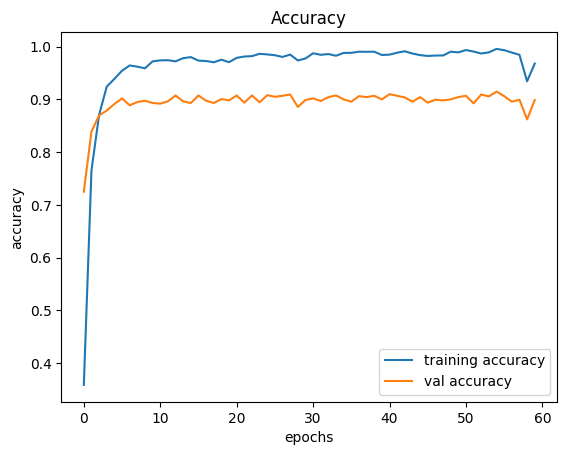

In [19]:
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

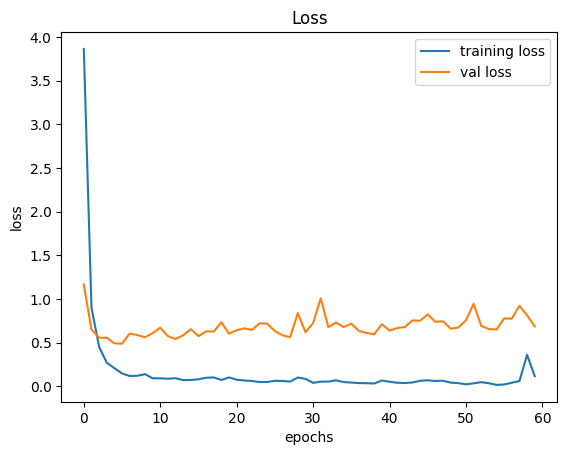

In [20]:
# loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test the Model

In [21]:
data_test = []
labels_test = []

for i in range(classes):
    path = os.path.join(train_path,'test',str(i))
    images = os.listdir(path)
    print(i)
    for a in images:
        try:
            if '.ipynb' not in a:
              image = Image.open(path + '//'+ a)
              image = image.resize((60,60))
              image = np.array(image)
              data_test.append(image)
              labels_test.append(i)
        except Exception as e:
            print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


In [24]:
len(data_test)

2368

In [25]:
X_test, label = np.array(data_test),labels_test
Y_pred = model.predict(X_test)
np.max(Y_pred[0])

74/74 [==============================] - 2s 22ms/step


1.0

In [26]:
pred_classes=[]
for c in Y_pred:
  c = c.tolist()
  pred_classes.append(c.index(np.max(c)))

In [27]:
labels.shape

(8055,)

# Accuracy with the Test dataset

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, pred_classes))

0.9125844594594594


# Save the Model

In [29]:
model.save("D:\TrafficSignDetectionSystem\Web App\model\TSDR2.h5")

# Load the Model

In [1]:
import os
os.chdir(r'D:\TrafficSignDetectionSystem\Train\DatabaseSplited')
from keras.models import load_model
model = load_model('D:\TrafficSignDetectionSystem\Web App\model\TSDR2.h5')

In [2]:
classes = {
    0 : 'Give way',
    1 : 'No entry',
    2 : 'One-way traffic',
    3 : 'One-way traffic',
    4 : 'No vehicles in both direction',
    5 : 'No entry for cycle',
    6 : 'No entry for goods vehicles',
    7 : 'No entry for pedestrians',
    8 : 'No entry for bullock carts',
    9 : 'No entry for hand carts',
    10 : 'No entry for motor vehicles',
    11 : 'Height limit',
    12 : 'Weight limit',
    13 : 'Axle weight limit',
    14 : 'Lenght limit',
    15 : 'No left turn',
    16 : 'No right turn',
    17 : 'No overtaking',
    18 : 'Maximum speed limit (90 km/h)',
    19 : 'Maximum speed limit (110 km/h)',
    20 : 'Horn prohibited',
    21 : 'No parking',
    22 : 'No stopping',
    23 : 'Turn left',
    24 : 'Turn right',
    25 : 'Steep descent',
    26 : 'Steep ascent',
    27 : 'Narrow Road',
    28 : 'Narrow bridge',
    29 : 'Unprotected quarry',
    30 : 'Road hump',
    31 : 'Dip',
    32 : 'Loose gravel',
    33 : 'Falling rocks',
    34 : 'Cattle',
    35 : 'Crossroads',
    36 : 'Side road junction',
    37 : 'Side road junction',
    38 : 'Oblique side road junction',
    39 : 'Oblique side road junction',
    40 : 'T-junction',
    41 : 'Y-junction',
    42 : 'Staggered side road junction',
    43 : 'Staggered side road junction',
    44 : 'Roundabout',
    45 : 'Guarded level crossing ahead',
    46 : 'Unguarded level crossing ahead',
    47 : 'Level crossing countdown maker',
    48 : 'Level crossing countdown Maker',
    49 : 'Level crossing countdown maker',
    50 : 'Level crossing countdown Maker',
    51 : 'Parking',
    52 : 'Bus stop',
    53 : 'First aid post',
    54 : 'Telephone',
    55 : 'Petrol pump / Filling station',
    56 : 'Hotel',
    57 : 'Reataurant',
    58 : 'Refreshments'
}

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((60,60))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

In [ ]:
plot,prediction = test_on_img(r'D:\TrafficSignDetectionSystem\Train\DatabaseSplited\test\0\1.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()